In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Besant\Project\IoT Traffic Analysis\IoT Traffic Data.csv")
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.20.19-54.77.51.148-33118-80-6,192.168.20.19,33118,54.77.51.148,80,6,06/12/2022 11:00:15 PM,36728,5,3,...,20,0,0,0,0,1.670368e+15,1.428227e+04,1.670368e+15,1.670368e+15,No Label
1,192.168.20.48-108.137.181.26-53948-443-6,192.168.20.48,53948,108.137.181.26,443,6,06/12/2022 11:00:51 PM,890408,17,16,...,32,0,0,0,0,1.670368e+15,1.818134e+05,1.670368e+15,1.670368e+15,No Label
2,192.168.20.43-34.232.93.236-58752-443-6,192.168.20.43,58752,34.232.93.236,443,6,06/12/2022 11:01:19 PM,3777984,13,13,...,32,0,0,0,0,1.670368e+15,3.286600e+05,1.670368e+15,1.670368e+15,No Label
3,192.168.20.43-54.70.5.180-46084-443-6,192.168.20.43,46084,54.70.5.180,443,6,06/12/2022 11:01:25 PM,8672390,17,16,...,32,0,0,0,0,1.670368e+15,1.159272e+06,1.670368e+15,1.670368e+15,No Label
4,192.168.20.15-255.255.255.255-49156-6666-17,192.168.20.15,49156,255.255.255.255,6666,17,06/12/2022 11:00:02 PM,116995737,40,0,...,8,0,0,0,0,1.670368e+15,3.333902e+07,1.670368e+15,1.670368e+15,No Label


In [8]:
# Function to assign device names based on traffic patterns
def assign_device_name(row):
    # Check port numbers and protocols commonly used by IoT devices
    if row['Protocol'] == 17:  # UDP
        if row['Dst Port'] == 6666:
            return "Smart Speaker"
        elif row['Dst Port'] == 6667:
            return "Security Camera"
        else:
            return "Smart Sensor"
    elif row['Protocol'] == 6:  # TCP
        if row['Dst Port'] == 443:
            return "Smart TV"
        elif row['Dst Port'] == 80:
            return "Smart Hub"
        else:
            return "Smart Home Controller"
    else:
        return "Unknown Device"

In [17]:
# Add device name column
df['Device_Name'] = df.apply(assign_device_name, axis=1)

In [14]:


# Basic data analysis
def analyze_iot_data(df):
    # 1. Basic statistics
    print("\n=== Basic Statistics ===")
    basic_stats = df[['Flow Duration', 'Flow Byts/s', 'Flow Pkts/s']].describe()
    print(basic_stats)
    
    # 2. Device distribution
    print("\n=== Device Distribution ===")
    device_counts = df['Device_Name'].value_counts()
    print(device_counts)
    
    # 3. Average traffic by device
    avg_traffic = df.groupby('Device_Name').agg({
        'Flow Byts/s': 'mean',
        'Flow Pkts/s': 'mean',
        'Flow Duration': 'mean'
    }).round(2)
    print("\n=== Average Traffic by Device ===")
    print(avg_traffic)
analyze_iot_data(df)


=== Basic Statistics ===
       Flow Duration   Flow Byts/s   Flow Pkts/s
count   3.525000e+04  3.525000e+04  35250.000000
mean    5.863364e+07  1.879731e+04    631.519588
std     4.878321e+07  1.223302e+05   2930.124725
min     3.900000e+01  0.000000e+00      0.016756
25%     2.550325e+04  5.986755e-01      0.099627
50%     6.487975e+07  5.784399e+00      0.217394
75%     1.078150e+08  4.084148e+03    145.555111
max     1.200000e+08  5.816327e+06  61224.489796

=== Device Distribution ===
Device_Name
Smart Sensor             11421
Smart TV                  9651
Smart Home Controller     6109
Unknown Device            3323
Smart Hub                 2645
Security Camera           1398
Smart Speaker              703
Name: count, dtype: int64

=== Average Traffic by Device ===
                       Flow Byts/s  Flow Pkts/s  Flow Duration
Device_Name                                                   
Security Camera              39.21         0.21   1.168890e+08
Smart Home Controller    

In [11]:
# Save the updated dataset
df.to_csv('iot_data_with_devices.csv', index=False)

In [12]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Device_Name
0,192.168.20.19-54.77.51.148-33118-80-6,192.168.20.19,33118,54.77.51.148,80,6,06/12/2022 11:00:15 PM,36728,5,3,...,0,0,0,0,1.670368e+15,1.428227e+04,1.670368e+15,1.670368e+15,No Label,Smart Hub
1,192.168.20.48-108.137.181.26-53948-443-6,192.168.20.48,53948,108.137.181.26,443,6,06/12/2022 11:00:51 PM,890408,17,16,...,0,0,0,0,1.670368e+15,1.818134e+05,1.670368e+15,1.670368e+15,No Label,Smart TV
2,192.168.20.43-34.232.93.236-58752-443-6,192.168.20.43,58752,34.232.93.236,443,6,06/12/2022 11:01:19 PM,3777984,13,13,...,0,0,0,0,1.670368e+15,3.286600e+05,1.670368e+15,1.670368e+15,No Label,Smart TV
3,192.168.20.43-54.70.5.180-46084-443-6,192.168.20.43,46084,54.70.5.180,443,6,06/12/2022 11:01:25 PM,8672390,17,16,...,0,0,0,0,1.670368e+15,1.159272e+06,1.670368e+15,1.670368e+15,No Label,Smart TV
4,192.168.20.15-255.255.255.255-49156-6666-17,192.168.20.15,49156,255.255.255.255,6666,17,06/12/2022 11:00:02 PM,116995737,40,0,...,0,0,0,0,1.670368e+15,3.333902e+07,1.670368e+15,1.670368e+15,No Label,Smart Speaker


Visualizations

In [18]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of IoT Devices')

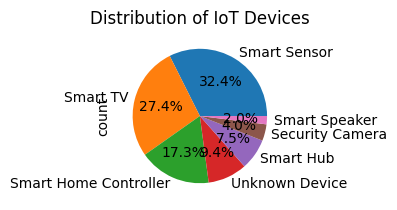

In [21]:
# Device distribution pie chart
device_count =  df["Device_Name"].value_counts()
plt.subplot(2, 2, 1)
device_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of IoT Devices')

Text(0.5, 1.0, 'Traffic Volume by Device')

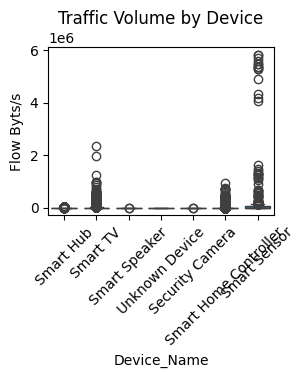

In [22]:
# Traffic volume by device
plt.subplot(2, 2, 2)
sns.boxplot(x='Device_Name', y='Flow Byts/s', data=df)
plt.xticks(rotation=45)
plt.title('Traffic Volume by Device')


Text(0.5, 1.0, 'Packet Rate by Device')

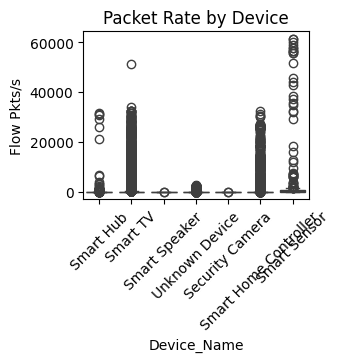

In [23]:
# Packet rate by device
plt.subplot(2, 2, 3)
sns.boxplot(x='Device_Name', y='Flow Pkts/s', data=df)
plt.xticks(rotation=45)
plt.title('Packet Rate by Device')

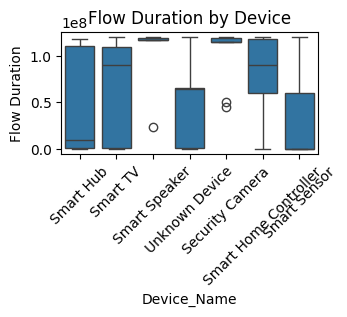

In [24]:
    # Flow duration by device
plt.subplot(2, 2, 4)
sns.boxplot(x='Device_Name', y='Flow Duration', data=df)
plt.xticks(rotation=45)
plt.title('Flow Duration by Device')

plt.tight_layout()
plt.show()

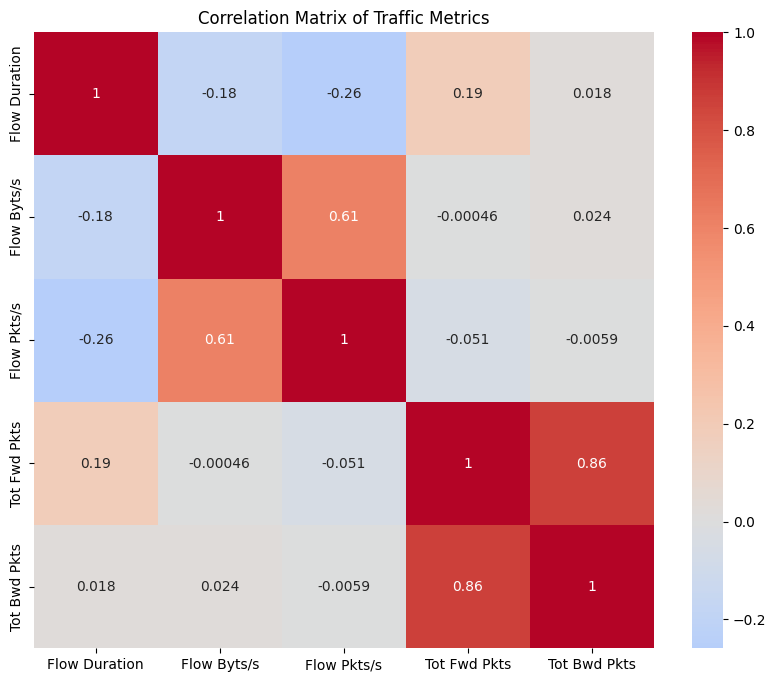

In [25]:
# 5. Correlation analysis
correlation_matrix = df[['Flow Duration', 'Flow Byts/s', 'Flow Pkts/s', 'Tot Fwd Pkts', 'Tot Bwd Pkts']].corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Traffic Metrics')
plt.show()

In [26]:
# Additional useful analyses for data analysts
def additional_insights(df):
    # 1. Time-based analysis (if timestamp is available)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Hour'] = df['Timestamp'].dt.hour
    
    # Traffic patterns by hour
    hourly_traffic = df.groupby(['Hour', 'Device_Name'])['Flow Byts/s'].mean().unstack()
    
    plt.figure(figsize=(12, 6))
    hourly_traffic.plot(marker='o')
    plt.title('Average Traffic by Hour for Each Device')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Bytes/s')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # 2. Top communication patterns
    top_communications = df.groupby(['Src IP', 'Dst IP', 'Device_Name']).size()\
                          .reset_index(name='frequency')\
                          .sort_values('frequency', ascending=False)\
                          .head(10)
    
    print("\n=== Top 10 Communication Patterns ===")
    print(top_communications)
    
    return hourly_traffic, top_communications


C:\Users\hp\AppData\Local\Temp\ipykernel_14956\591928551.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


<Figure size 1200x600 with 0 Axes>

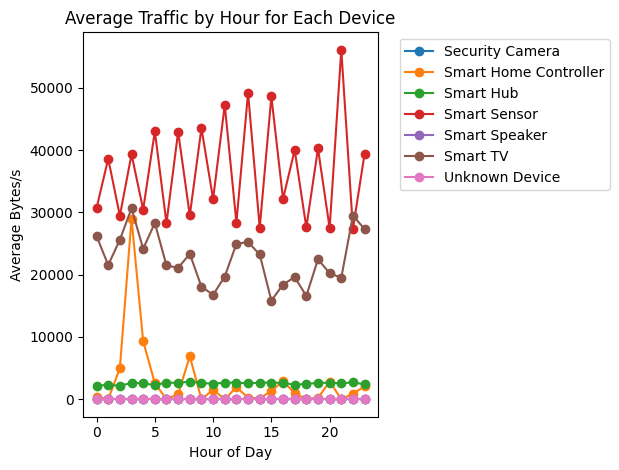


=== Top 10 Communication Patterns ===
            Src IP           Dst IP            Device_Name  frequency
153  192.168.20.42          8.8.8.8           Smart Sensor       1643
147  192.168.20.42  255.255.255.255           Smart Sensor       1307
95   192.168.20.19          8.8.8.8           Smart Sensor       1277
362  192.168.20.43          8.8.8.8           Smart Sensor       1069
152  192.168.20.42     66.102.1.188  Smart Home Controller       1053
94   192.168.20.19          8.8.4.4           Smart Sensor        991
137  192.168.20.42   216.58.214.163              Smart Hub        749
156  192.168.20.43   104.199.65.124  Smart Home Controller        711
377  192.168.20.48   104.199.65.124               Smart TV        710
372  192.168.20.45      52.9.40.194  Smart Home Controller        709


In [27]:

# Run additional insights
hourly_patterns, top_comms = additional_insights(df)